## RAFAEL JAEKEL ROTTER
Descobrimos através da análise destes dados qual a popularidade dos gêneros dos filmes, suas quantidades de filmes e votos por categoria, além de fazer um comparativo entre alguns deles para poder estimar qual filme de qual categoria traria maior rentabilidade.

## Formação Data Science Alura - Análise exploratória do MovieLens

Na formação de Data Scienda www.alura.com.br um dos conjuntos de dados que utilizamos é o de avaliações para filmes no site MovieLens. Neste projeto faremos uma análise exploratória desses dados.

### Dicas para o projeto completo:

- todo gráfico deve ter um título, labels e legendas que fazem sentido
- configure um tamanho adequado para os gráficos
- utilize as versões dos arquivos de dados disponíveis no github

## Pergunta: conferindo as versões utilizadas

- Devemos usar pandas 0.24.0 ou mais recente
- Devemos usar seaborn 0.9.0 ou mais recente
- Devemos usar scipy 1.2.0 ou mais recente

In [1]:
!pip install pandas=="0.24.0" --quiet
!pip install seaborn=="0.9.0" --quiet
!pip install scipy=="1.2.0" --quiet

     |████████████████████████████████| 10.1MB 4.9MB/s 


In [2]:
import pandas as pd
import seaborn as sns
import scipy

print("Usando pandas %s" % pd.__version__)
print("Usando seaborn %s" % sns.__version__)
print("Usando scipy %s" % scipy.__version__)

Usando pandas 0.24.2
Usando seaborn 0.9.0
Usando scipy 1.3.1


## Pergunta: carregue os filmes

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/movies.csv` devem ser carregado em `filmes`
- renomeie as colunas para `filmeId`, `titulo` e `generos`
- configure o indice (`index`) para ser o `filmeId`

In [0]:
# solução
filmes = pd.read_csv("movies.csv")
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.set_index('filmeId', inplace=True)

In [4]:
filmes.head()

,titulo,generos
filmeId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [5]:
print("Carregamos %d filmes" % len(filmes))
if(len(filmes) != 9742):
    print("ERRO! O conjunto de dados que estamos trabalhando nesse projeto possui 9742 elementos.")

Carregamos 9742 filmes


Vamos extrair o ano dos filmes (código já pronto): 

In [6]:
ano_de_lancamento = filmes.titulo.str.extract("\((\d{4})\)")
filmes['ano_de_lancamento'] = ano_de_lancamento.astype(float)
filmes.head()

,titulo,generos,ano_de_lancamento
filmeId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0
5,Father of the Bride Part II (1995),Comedy,1995.0


## Pergunta: carregando as notas

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/ratings.csv` devem ser carregado em `notas`
- renomeie as colunas para `usuarioId`, `filmeId`, `nota` e `momento`

In [0]:
# solução
notas = pd.read_csv("ratings.csv")
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]

In [8]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Pergunta: gere uma nova feature, a média dos votos por filme

- crie uma nova coluna chamada `nota_media` dentro do dataframe `filmes`

Dicas:
- como filmeId já é o indice de seu dataframe filmes, se você possui uma série com o número de votos por filme, basta atribuir uma nova coluna normalmente que será usado o mesmo índice

In [0]:
# solução
filmes['nota_media'] = notas.groupby("filmeId").mean().nota	

In [10]:
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,2.357143
5,Father of the Bride Part II (1995),Comedy,1995.0,3.071429


## Pergunta: remova os filmes com menos de 50 avaliações

- conte o número de notas por filme
- adicione uma coluna nova chamada `total_de_votos` a `filmes` que representa o número de avaliações que aquele filme teve no conjunto de dados
- remova os que tem 49 ou menos de `filmes`

## Solução

In [11]:
# solução para calcular o total de votos por filme
notas.groupby("filmeId").count().nota

filmeId
1         215
2         110
3          52
4           7
5          49
6         102
7          54
8           8
9          16
10        132
11         70
12         19
13          8
14         18
15         13
16         82
17         67
18         20
19         88
20         15
21         89
22         36
23         16
24         28
25         76
26         13
27          9
28         11
29         38
30          3
         ... 
188189      1
188301      3
188675      1
188751      1
188797      1
188833      1
189043      1
189111      1
189333      2
189381      1
189547      1
189713      1
190183      1
190207      1
190209      1
190213      1
190215      1
190219      1
190221      1
191005      1
193565      1
193567      1
193571      1
193573      1
193579      1
193581      1
193583      1
193585      1
193587      1
193609      1
Name: nota, Length: 9724, dtype: int64

In [0]:
# solução para criar a nova coluna e filtrar os filmes
filmes['total_de_votos'] = notas.groupby("filmeId").count().nota	
filmes = filmes.query("total_de_votos>=50")

In [13]:
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media,total_de_votos
filmeId,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818,110.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615,52.0
6,Heat (1995),Action|Crime|Thriller,1995.0,3.946078,102.0
7,Sabrina (1995),Comedy|Romance,1995.0,3.185185,54.0


# Visualizando os dados gerais

## Pergunta: Visualize as notas médias

- histograma
- cummulative distribution function

Dicas:

- lembre-se de colocar um título nas imagens além de nomes nos eixos x e y
- para gerar a versão cumulativa lembre-se de usar os parâmetros `hist_kws` e `kde_kws` para definir `'cumulative'=True`

Text(0.5, 1.0, 'Distribuição de Frequência de Notas Médias dos Filmes')

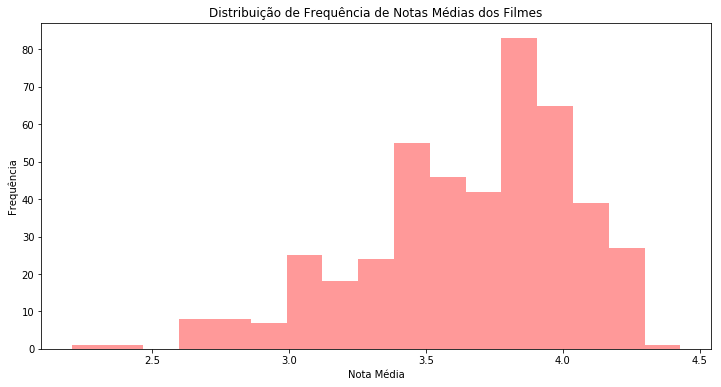

In [14]:
# solução histograma
histograma01 = sns.distplot(filmes.nota_media, kde=False, color='r')
histograma01.figure.set_size_inches(12,6)		
histograma01.set(xlabel="Nota Média", ylabel="Frequência")
histograma01.set_title("Distribuição de Frequência de Notas Médias dos Filmes")

Text(0.5, 1.0, 'Distribuição Cumulativa de Notas Médias dos Filmes')

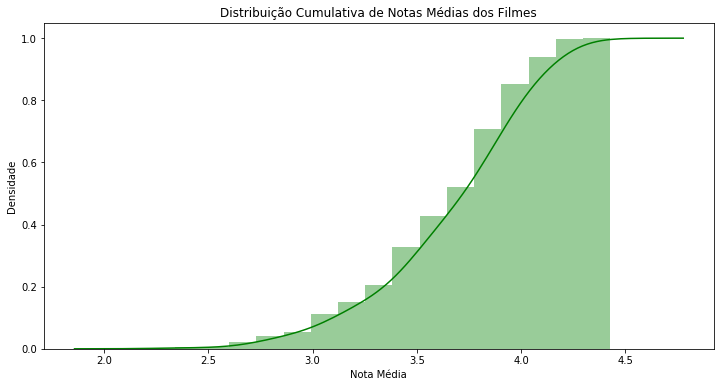

In [15]:
# solução cumulativa
histograma01c = sns.distplot(filmes.nota_media, hist_kws = {'cumulative': True}, kde_kws = {'cumulative': True}, color='green')
histograma01c.figure.set_size_inches(12,6)		
histograma01c.set(xlabel="Nota Média", ylabel="Densidade")
histograma01c.set_title("Distribuição Cumulativa de Notas Médias dos Filmes")

## Pergunta: Visualize o total de votos

- histograma
- cummulative distribution function

Text(0.5, 1.0, 'Distribuição de Frequência de Votos dos Filmes')

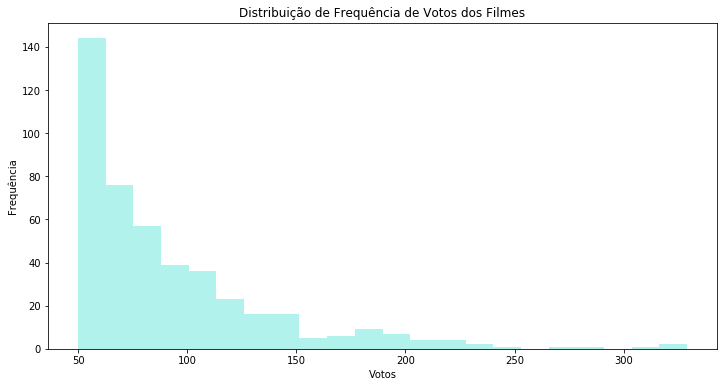

In [16]:
# solução histograma
histograma02 = sns.distplot(filmes.total_de_votos, kde=False, color='turquoise')
histograma02.figure.set_size_inches(12,6)		
histograma02.set(xlabel="Votos", ylabel="Frequência")
histograma02.set_title("Distribuição de Frequência de Votos dos Filmes")

Text(0.5, 1.0, 'Distribuição Cumulativa de Votos dos Filmes')

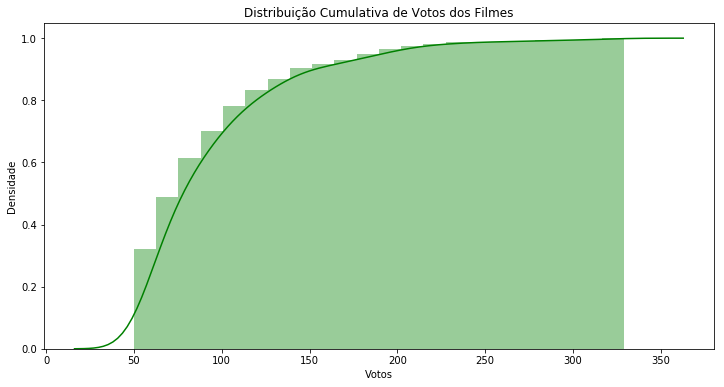

In [17]:
# solução cumulativa
histograma02c = sns.distplot(filmes.total_de_votos, hist_kws = {'cumulative': True}, kde_kws = {'cumulative': True}, color='green')
histograma02c.figure.set_size_inches(12,6)		
histograma02c.set(xlabel="Votos", ylabel="Densidade")
histograma02c.set_title("Distribuição Cumulativa de Votos dos Filmes")

## Pergunta: 20% dos filmes do dataframe tem nota maior que? 

- lembre-se da função `quantile` do pandas

In [0]:
# solução
nota_limite_dos_20_porcento = filmes['nota_media'].quantile(q=0.8)

In [62]:
print("20 porcento dos filmes tem nota maior que %.2f" % nota_limite_dos_20_porcento)

20 porcento dos filmes tem nota maior que 3.99


## Vamos separar a coluna `generos` em diversas colunas.

- O código já está pronto.

In [20]:
filmes['generos'] = filmes['generos'].str.replace('-', '')
generos = filmes['generos'].str.get_dummies()
print("Temos %d generos distintos" % generos.shape[1])

Temos 19 generos distintos


In [21]:
filmes = filmes.join(generos).drop(columns=['generos'], axis=1)
filmes.head()

,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1995.0,3.920930,215.0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),1995.0,3.431818,110.0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),1995.0,3.259615,52.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6,Heat (1995),1995.0,3.946078,102.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
7,Sabrina (1995),1995.0,3.185185,54.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


## Pergunta: visualização de quantos filmes existem por genero

- Para cada um dos generos você deve agrupar o número de filmes
- Ordene as barras, na esquerda o genero com mais filmes, na direita o que tem menos filmes

Dica:

- Para fazer a soma de uma ou mais colunas individualmente você pode usar `seu_dataframe.sum()`
- Não precisa usar o dataframe `filmes`, somente o dataframe `generos`
- Em certas situações é mais fácil usar as funções de plotagem do pandas ao invés do seaborn

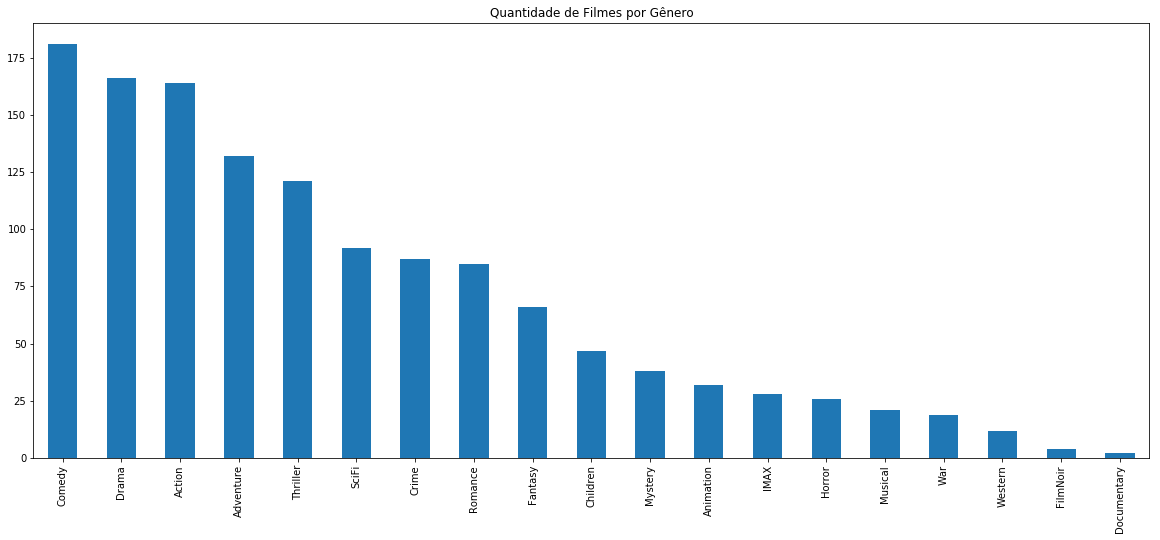

In [65]:
# solução
qtd_filmes_por_genero_temp = generos.sum().to_frame().reset_index()
qtd_filmes_por_genero_temp.columns = ['generos', 'qtd_filmes']
qtd_filmes_por_genero_temp.sort_values(by=['qtd_filmes'], inplace=True, ascending=False)
qtd_filmes_por_genero = qtd_filmes_por_genero_temp.plot.bar(x='generos', y='qtd_filmes', figsize=(20,8), title='Quantidade de Filmes por Gênero', legend=False)
qtd_filmes_por_genero.xaxis.set_label_text("")
qtd_filmes_por_genero.yaxis.set_label_text("")
qtd_filmes_por_genero

## Pergunta: Quais são os 5 generos com mais filmes?

Dica:

- `sort_values()` pode ordenar uma Series do pandas

In [0]:
# solução
top5_generos_em_quantidade_de_filmes = generos.sum().to_frame().reset_index()
top5_generos_em_quantidade_de_filmes.columns = ['generos', 'qtd_filmes']
top5_generos_em_quantidade_de_filmes.sort_values(by=['qtd_filmes'], inplace=True, ascending=False)
top5_generos_em_quantidade_de_filmes = top5_generos_em_quantidade_de_filmes.head()
top5_generos_em_quantidade_de_filmes.set_index('generos', inplace=True)


In [24]:
print(top5_generos_em_quantidade_de_filmes)

           qtd_filmes
generos              
Comedy            181
Drama             166
Action            164
Adventure         132
Thriller          121


## Pergunta: visualização de votos por genero

- o código que gera os votos por genero já está pronto
- ordene as categorias da mais visualizada para a menos visualizada
- gere a visualização por genero

In [25]:
votos_por_genero_por_filme = pd.DataFrame((generos.values.T * filmes['total_de_votos'].values).T, columns = generos.columns)
votos_por_genero_por_filme.head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,0.0,215.0,215.0,215.0,215.0,0.0,0.0,0.0,215.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,110.0,0.0,110.0,0.0,0.0,0.0,0.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0
3,102.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0
4,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0


In [26]:
# solucão
votos_por_genero_por_filme_desc = votos_por_genero_por_filme.sum().to_frame().reset_index()
votos_por_genero_por_filme_desc.columns = ['generos', 'qtd_votos']
votos_por_genero_por_filme_desc.sort_values(by=['qtd_votos'], inplace=True, ascending=False)
votos_por_genero_por_filme_desc

,generos,qtd_votos
0,Action,15734.0
7,Drama,15445.0
4,Comedy,15330.0
1,Adventure,13117.0
16,Thriller,11907.0
15,SciFi,8989.0
5,Crime,8649.0
14,Romance,7444.0
8,Fantasy,5993.0
3,Children,4331.0


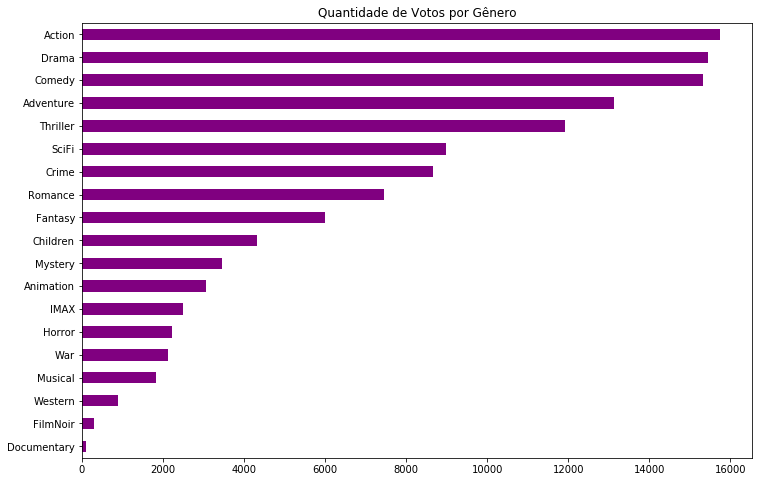

In [27]:
# solução
votos_por_genero_por_filme_desc.sort_values(by=['qtd_votos'], inplace=True, ascending=True)
votos_por_genero_por_filme_desc_vis = votos_por_genero_por_filme_desc.plot.barh(x='generos', y='qtd_votos', figsize=(12,8), title='Quantidade de Votos por Gênero', legend=False, color='purple')
votos_por_genero_por_filme_desc_vis.xaxis.set_label_text("")
votos_por_genero_por_filme_desc_vis.yaxis.set_label_text("")
votos_por_genero_por_filme_desc_vis

## Pergunta : votos por filme por genero

Queremos entender a quantidade de votos em relação a quantidade de filmes existentes naquele genero.

Por exemplo: 
- se temos 1000 votos de `Ação` e 10 filmes desse genero, foram 100 votos por filme nesse genero.
- se o gênero `Documentário` tem 2 filmes e 500 votos, ele tem 250 votos por filme nesse gênero.

Queremos entender isso, a "popularidade" média de um filme em cada categoria, isto é, o número de votos dividido pelo número de filmes, organizado para cada categoria.

- Você já possui o número de votos por genero
- Calcule o número de votos por genero dividido pelo total de filmes por genero
- Ordene do maior para o menor
- Plote um gráfico para visualizarmos esses dados

In [28]:
# solucao código
votos_por_filme_por_genero = votos_por_genero_por_filme_desc
votos_por_filme_por_genero['qtd_filmes'] = qtd_filmes_por_genero_temp['qtd_filmes']
votos_por_filme_por_genero['popularidade'] = votos_por_filme_por_genero['qtd_votos']/votos_por_filme_por_genero['qtd_filmes']
votos_por_filme_por_genero.sort_values(by=['popularidade'], inplace=True, ascending=False)
votos_por_filme_por_genero

,generos,qtd_votos,qtd_filmes,popularidade
17,War,2113.0,19,111.210526
5,Crime,8649.0,87,99.413793
1,Adventure,13117.0,132,99.371212
16,Thriller,11907.0,121,98.404959
15,SciFi,8989.0,92,97.706522
0,Action,15734.0,164,95.939024
2,Animation,3066.0,32,95.812500
7,Drama,15445.0,166,93.042169
3,Children,4331.0,47,92.148936
13,Mystery,3452.0,38,90.842105


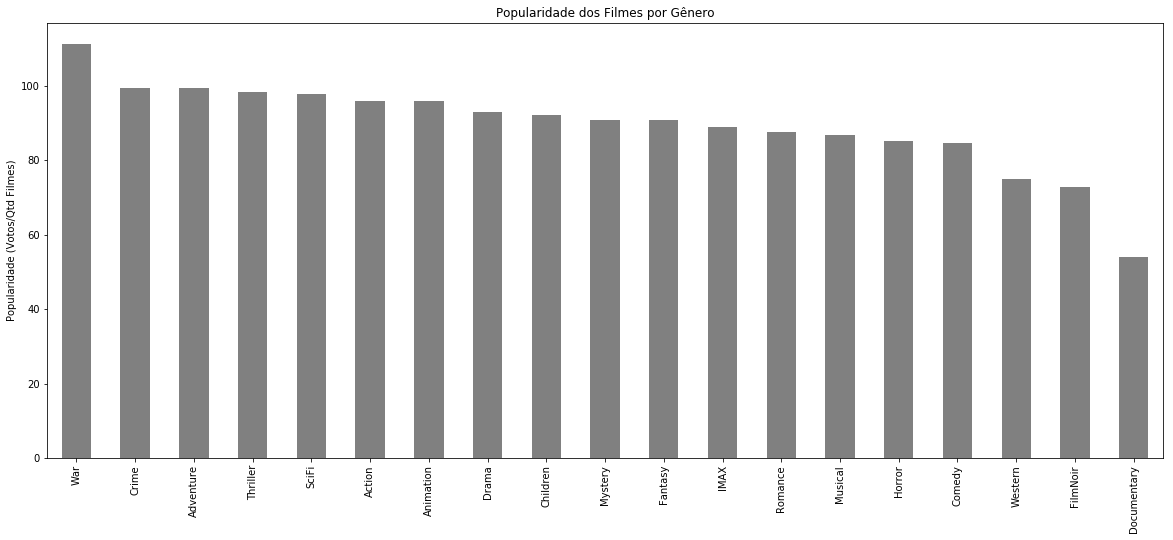

In [67]:
# solução com visualização 
votos_por_filme_por_genero.sort_values(by=['popularidade'], inplace=True, ascending=False)
votos_por_filme_por_genero_vis = votos_por_filme_por_genero.plot.bar(x='generos', y='popularidade', figsize=(20,8), 
                                                                     title='Popularidade dos Filmes por Gênero', legend=False, color='gray')
votos_por_filme_por_genero_vis.xaxis.set_label_text("")
votos_por_filme_por_genero_vis.yaxis.set_label_text("Popularidade (Votos/Qtd Filmes)")
votos_por_filme_por_genero_vis


## Pergunta: Olhando as 3 últimas visualizações o que você conclui sobre os generos `Action` e `War`?

### Solução (texto livre):
     Apesar da baixa quantidade de filmes e votos, 19 e 2113, respectivamente, War é um gênero mais popular que Adventure (15.734 votos / 164 filmes). 
     Podemos concluir que War possui um público fiel aos seus filmes.

## Pergunta: Crie 2 boxplots no mesmo plot comparando a coluna `total_de_votos` dos filmes de categoria `Horror` e `Adventure`  

Dica:

- as vezes é mais fácil usar o boxplot do matplotlib ao invés do seaborn
- plt.boxplot suporta o parâmetro labels com uma lista de nomes para cada boxplot plotado

Text(0, 0.5, 'Total de Votos')

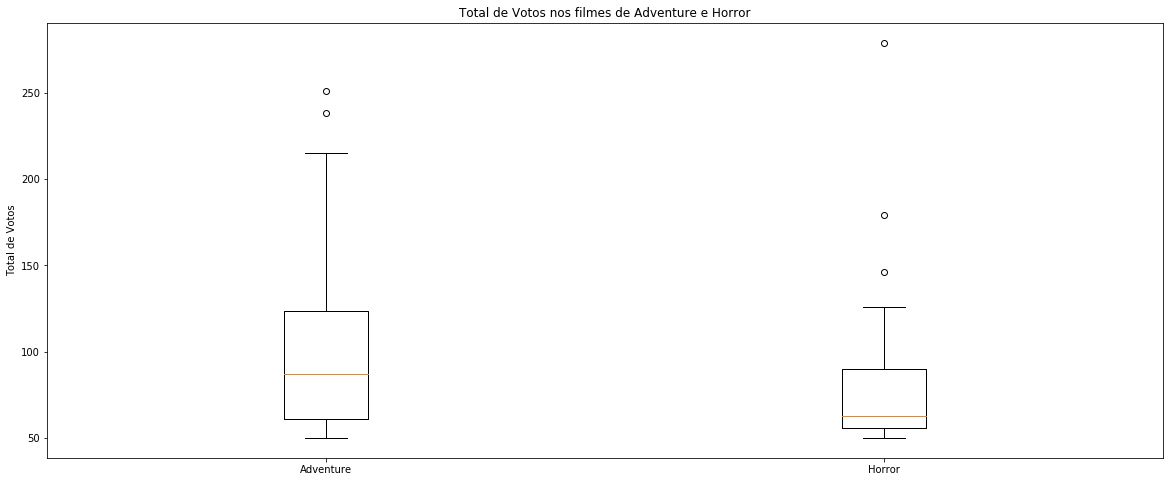

In [30]:
# solução:
import matplotlib.pyplot as plt

boxplot_adventure = filmes.query("Adventure==1")
boxplot_horror = filmes.query("Horror==1")  

fig, ax = plt.subplots(figsize=(20,8))	
plt.boxplot([boxplot_adventure.total_de_votos, boxplot_horror.total_de_votos], labels=["Adventure", "Horror"])
plt.title("Total de Votos nos filmes de Adventure e Horror", fontsize=12)
ax.set_ylabel('Total de Votos')		        

## Pergunta: mostre agora um boxplot para cada uma das categorias

Dica:
- use generos.columns para acessar todos os gêneros
- já removemos os hífens dos nomes das colunas quando criamos as colunas de gêneros
- plt (pyplot) do matplotlib suporta a função xticks(rotation=90) para rotacionar os labels

In [68]:
generos.columns

Index(['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'FilmNoir', 'Horror', 'IMAX',
       'Musical', 'Mystery', 'Romance', 'SciFi', 'Thriller', 'War', 'Western'],
      dtype='object')

Text(0, 0.5, 'Total de Votos')

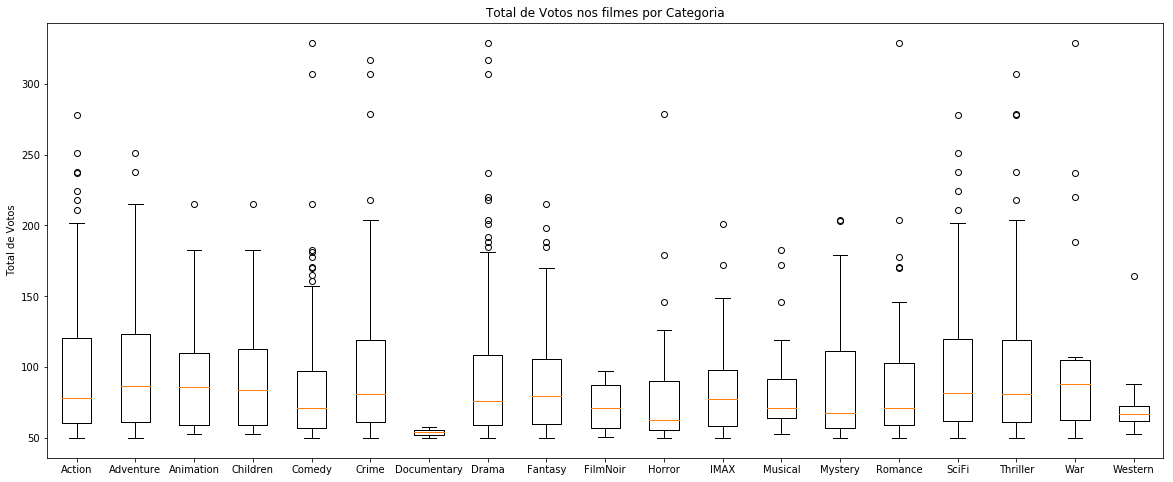

In [31]:
boxplot_Action = filmes.query("Action==1")
boxplot_Adventure = filmes.query("Adventure==1")
boxplot_Animation = filmes.query("Animation==1")
boxplot_Children = filmes.query("Children==1")
boxplot_Comedy = filmes.query("Comedy==1")
boxplot_Crime = filmes.query("Crime==1")
boxplot_Documentary = filmes.query("Documentary==1")
boxplot_Drama = filmes.query("Drama==1")
boxplot_Fantasy = filmes.query("Fantasy==1")
boxplot_FilmNoir = filmes.query("FilmNoir==1")
boxplot_Horror = filmes.query("Horror==1")
boxplot_IMAX = filmes.query("IMAX==1")
boxplot_Musical = filmes.query("Musical==1")                              
boxplot_Mystery = filmes.query("Mystery==1")
boxplot_Romance = filmes.query("Romance==1")
boxplot_SciFi = filmes.query("SciFi==1")
boxplot_Thriller = filmes.query("Thriller==1")
boxplot_War = filmes.query("War==1")
boxplot_Western = filmes.query("Western==1")

fig, ax = plt.subplots(figsize=(20,8))	
plt.boxplot([boxplot_Action.total_de_votos,
			boxplot_Adventure.total_de_votos,
			boxplot_Animation.total_de_votos,
			boxplot_Children.total_de_votos,
			boxplot_Comedy.total_de_votos,
			boxplot_Crime.total_de_votos,
			boxplot_Documentary.total_de_votos,
			boxplot_Drama.total_de_votos,
			boxplot_Fantasy.total_de_votos,
			boxplot_FilmNoir.total_de_votos,
			boxplot_Horror.total_de_votos,
			boxplot_IMAX.total_de_votos,
			boxplot_Musical.total_de_votos,
			boxplot_Mystery.total_de_votos,
			boxplot_Romance.total_de_votos,
			boxplot_SciFi.total_de_votos,
			boxplot_Thriller.total_de_votos,
			boxplot_War.total_de_votos,
			boxplot_Western.total_de_votos]
, labels=["Action", "Adventure", "Animation", "Children", "Comedy", "Crime","Documentary", "Drama", "Fantasy", "FilmNoir", "Horror", "IMAX","Musical", "Mystery", "Romance", "SciFi", "Thriller", "War", "Western"])
plt.title("Total de Votos nos filmes por Categoria", fontsize=12)
ax.set_ylabel('Total de Votos')		

## Pergunta: desejo criar um filme com somente um dos gêneros: `Horror` ou `Adventure`. Quero ter uma chance maior de ter um faturamento que pague minhas contas, mesmo que não seja um super sucesso absurdo de vendas. Qual dos 2 gêneros você sugere?

### Solução: Em um primeiro momento 'Adventure', pois apresenta uma quantidade maior de votos comparado Horror.
    


## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição dos votos dos filmes de `Adventure` e `Horror`. Sua recomendação continua a mesma? Explique.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

Text(0.5, 1.0, 'Distribuição de Votos dos Filmes de Adventure')

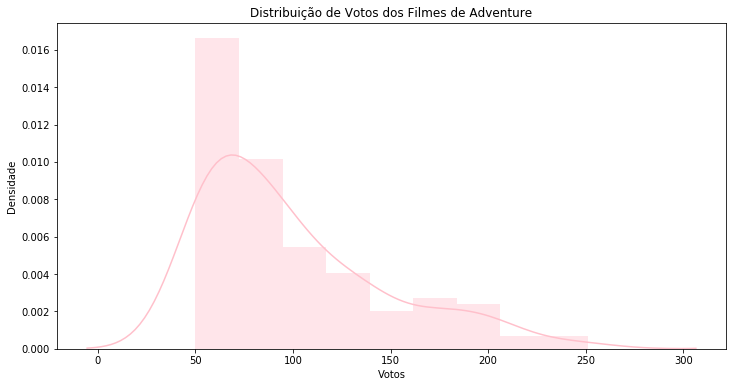

In [32]:
# solucao histograma de aventura
histograma_aventura = sns.distplot(boxplot_Adventure.total_de_votos, color='pink')
histograma_aventura.figure.set_size_inches(12,6)		
histograma_aventura.set(xlabel="Votos", ylabel="Densidade")
histograma_aventura.set_title("Distribuição de Votos dos Filmes de Adventure")

Text(0.5, 1.0, 'Distribuição de Votos dos Filmes de Horror')

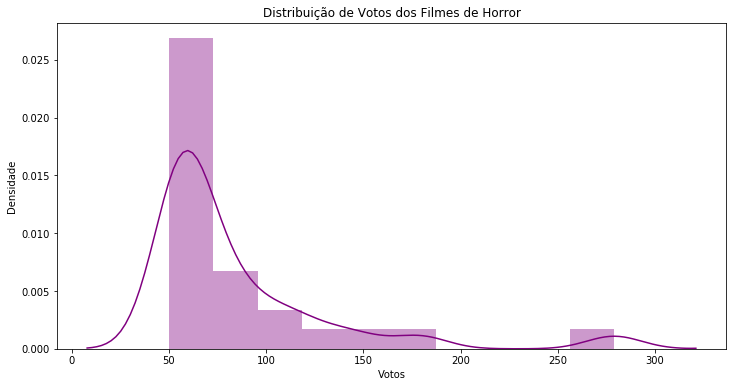

In [33]:
# solucao histograma de horror
histograma_horror = sns.distplot(boxplot_Horror.total_de_votos, color='purple')
histograma_horror.figure.set_size_inches(12,6)		
histograma_horror.set(xlabel="Votos", ylabel="Densidade")
histograma_horror.set_title("Distribuição de Votos dos Filmes de Horror")

In [34]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo
from scipy.stats import normaltest

stat, a = normaltest(boxplot_Adventure.total_de_votos)
a

5.987863006199139e-06

In [35]:
stat, b = normaltest(boxplot_Horror.total_de_votos)
b 

1.2786148884334685e-07

In [36]:
# solução com o teste desejado
from scipy.stats import ranksums
ranksums(boxplot_Adventure.total_de_votos, boxplot_Horror.total_de_votos)

RanksumsResult(statistic=1.9789320045004148, pvalue=0.04782366231999856)

### Solução (explique sua conclusão):
Depois de realizar os testes cheguei a conclusão que War e Adventure apresentam uma diferença significativa com relação as suas distribuições de votos, pois ficaram abaixo de 0.05 nos testes realizados. 
Adventure é o gênero que pode dar mais retorno se comparado a War, mesmo que o p-value esteja próximo de 0.05.



## Pergunta: Faça os mesmos boxplots para as notas médias (`nota_media`) dos gêneros `Adventure` e `Horror`.

Text(0, 0.5, 'Nota Média')

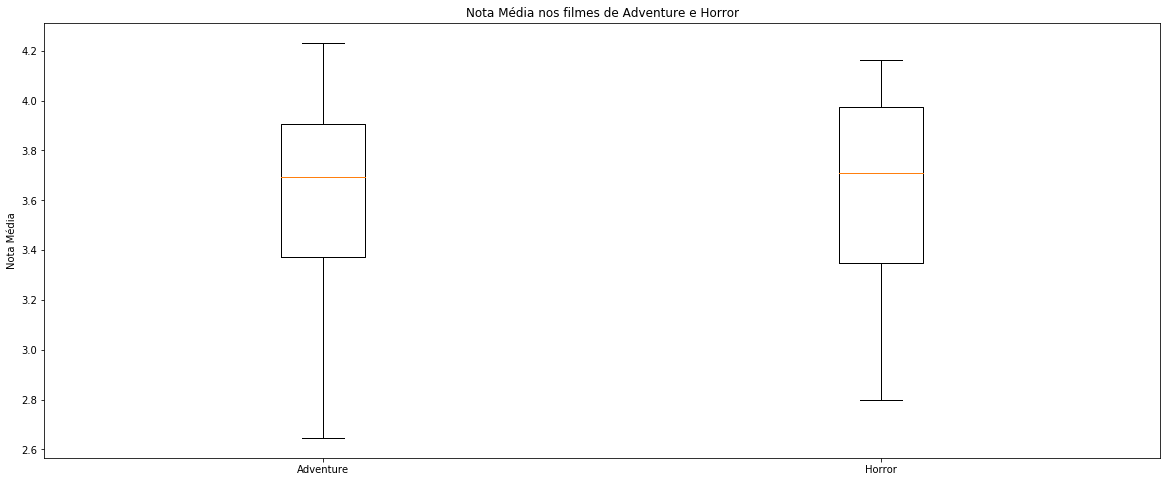

In [71]:
# solução:
fig, ax = plt.subplots(figsize=(20,8))
plt.boxplot([boxplot_Adventure.nota_media, boxplot_Horror.nota_media], labels=["Adventure", "Horror"])
plt.title("Nota Média nos filmes de Adventure e Horror", fontsize=12)
ax.set_ylabel('Nota Média')				

## Pergunta: Quero fazer um filme que seja sucesso de crítica, com pessoas dando notas altas, mesmo que não tenha um número muito grande de pessoas assistindo. Qual gênero você recomenda se tenho que escolher somente um entre `Adventure` e `Horror`?

## Solução: analisando os boxplots acima, escolheria 'Horror'.


## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição das notas dos filmes de `Adventure` e `Horror`.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

Text(0.5, 1.0, 'Distribuição de Notas Médias dos Filmes de Adventure')

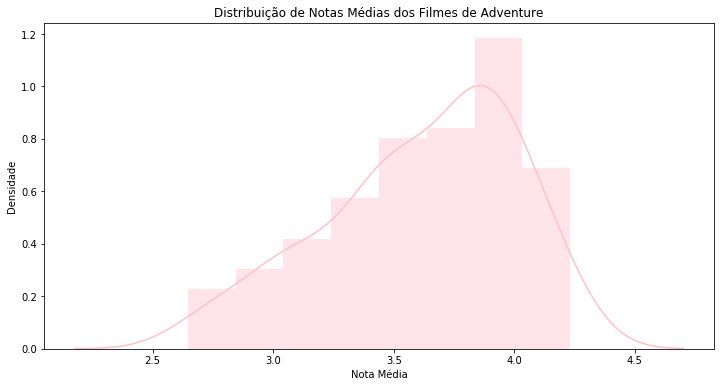

In [38]:
# solucao histograma de aventura
histograma_aventura2 = sns.distplot(boxplot_Adventure.nota_media, color='pink')
histograma_aventura2.figure.set_size_inches(12,6)		
histograma_aventura2.set(xlabel="Nota Média", ylabel="Densidade")
histograma_aventura2.set_title("Distribuição de Notas Médias dos Filmes de Adventure")

Text(0.5, 1.0, 'Distribuição de Notas Médias dos Filmes de Horror')

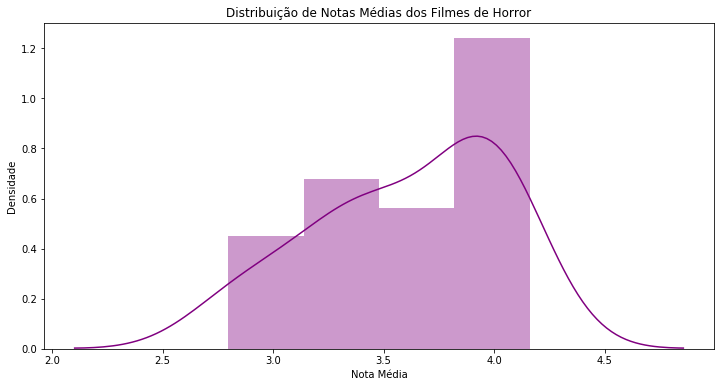

In [39]:
# solucao histograma de horror
histograma_horror2 = sns.distplot(boxplot_Horror.nota_media, color='purple')
histograma_horror2.figure.set_size_inches(12,6)		
histograma_horror2.set(xlabel="Nota Média", ylabel="Densidade")
histograma_horror2.set_title("Distribuição de Notas Médias dos Filmes de Horror")

In [40]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo
stat, a = normaltest(boxplot_Adventure.nota_media)
a

0.012835697582553224

In [41]:
stat, b = normaltest(boxplot_Horror.nota_media)
b

0.21186284682483916

In [44]:
# solução com o teste desejado
from statsmodels.stats.weightstats import zconfint 	
zconfint(boxplot_Adventure.nota_media, boxplot_Horror.nota_media)

(-0.16196987742954458, 0.17166316262580447)

*# Não consegui resolver o exercício acima.*


---



## Sua recomendação para maior sucesso de crítica em nota alta entre `Horror` e `Adventure` continua a mesma? Explique.



### Solução:


*# Não consegui resolver o exercício acima.*


---



## Pergunta: Quero fazer um filme que seja primeiro sucesso de crítica, com pessoas dando notas altas. Em segundo lugar quero que seja popular (mais pessoas assistam). Com as informações visuais e estatísticas, supondo poder escolher somente um, qual dois 2 gêneros você recomenda agora? `Horror` ou `Adventure`?

### Solução:



*# Não consegui resolver o exercício acima.*


---



## Pergunta: Quais são os top 5 filmes dos 2 generos mais assistidas?

- utilize os 2 generos mais votados em `votos_por_genero`
- utilize a `nota_media` para definir o top 5 filmes
- o resultado são 5, não 10 filmes

In [45]:
# solução: calculando os 2 generos mais votados
votos_por_genero_por_filme_desc.sort_values(by=['qtd_votos'], inplace=True, ascending=False)
votos_por_genero_por_filme_desc[0:2]

,generos,qtd_votos,qtd_filmes,popularidade
0,Action,15734.0,164,95.939024
7,Drama,15445.0,166,93.042169


In [46]:
# solução: encontrando os top 5 filmes desses generos
top_5_action_drama = filmes.query("Action==1 or Drama ==1")
top_5_action_drama.sort_values(by=['nota_media'], inplace=True, ascending=False)
top_5_action_drama.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,,,,,
318,"Shawshank Redemption, The (1994)",1994.0,4.429022,317.0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
858,"Godfather, The (1972)",1972.0,4.289062,192.0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
2959,Fight Club (1999),1999.0,4.272936,218.0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
1276,Cool Hand Luke (1967),1967.0,4.271930,57.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1221,"Godfather: Part II, The (1974)",1974.0,4.259690,129.0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0


## Pergunta: Quais são os 2 generos com maior valor de correlação com a `nota_media`? E os 2 com menor valor de correlação com a `nota_media`?

- O pandas possui a função `corr` para calcular correlação entre todas as colunas

In [47]:
# solucao
filmes.corr().round(4)

,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
ano_de_lancamento,1.0000,-0.1591,-0.0287,0.1404,0.1143,-0.0529,-0.1490,0.0193,0.0610,0.0477,0.0284,-0.0768,0.0022,-0.0269,0.2480,-0.2962,0.0056,-0.0246,0.0698,0.1045,0.0261,-0.0625
nota_media,-0.1591,1.0000,0.3426,-0.1541,-0.0800,0.0431,-0.0304,-0.2560,0.1902,-0.0035,0.2777,-0.0210,0.0818,-0.0339,0.0649,-0.0085,0.1299,-0.0720,-0.1367,-0.0168,0.1256,-0.0596
total_de_votos,-0.0287,0.3426,1.0000,0.0662,0.1044,0.0234,0.0018,-0.1285,0.0798,-0.0550,0.0188,-0.0100,-0.0394,-0.0361,-0.0163,-0.0247,-0.0071,-0.0454,0.0638,0.0855,0.0880,-0.0608
Action,0.1404,-0.1541,0.0662,1.0000,0.3336,-0.1736,-0.2133,-0.2916,0.0619,-0.0506,-0.2536,-0.1182,-0.0225,-0.0094,0.1299,-0.1456,-0.0639,-0.2003,0.3260,0.3114,0.0706,0.0466
Adventure,0.1143,-0.0800,0.1044,0.3336,1.0000,0.1636,0.1790,-0.0905,-0.2413,-0.0430,-0.2903,0.2434,-0.0610,-0.0968,0.2180,-0.0500,-0.0903,-0.1737,0.2785,-0.0054,-0.0867,0.0448
Animation,-0.0529,0.0431,0.0234,-0.1736,0.1636,1.0000,0.7537,0.1257,-0.0917,-0.0185,-0.1219,0.2275,-0.0262,-0.0685,0.1077,0.4307,-0.0529,0.0211,-0.0974,-0.1678,-0.0581,-0.0458
Children,-0.1490,-0.0304,0.0018,-0.2133,0.1790,0.7537,1.0000,0.1200,-0.1304,-0.0228,-0.1256,0.3719,-0.0323,-0.0846,0.0925,0.4067,-0.0776,-0.0163,-0.1011,-0.2071,-0.0717,-0.0565
Comedy,0.0193,-0.2560,-0.1285,-0.2916,-0.0905,0.1257,0.1200,1.0000,-0.1262,0.0133,-0.2890,0.0955,-0.0777,-0.0283,-0.1550,0.0549,-0.2002,0.2294,-0.2136,-0.3646,-0.0821,0.0049
Crime,0.0610,0.1902,0.0798,0.0619,-0.2413,-0.0917,-0.1304,-0.1262,1.0000,-0.0327,0.0922,-0.1552,0.1934,-0.0489,-0.0329,-0.1083,0.1144,-0.2075,-0.1784,0.2488,-0.0748,-0.0810
Documentary,0.0477,-0.0035,-0.0550,-0.0506,-0.0430,-0.0185,-0.0228,0.0133,-0.0327,1.0000,0.0182,-0.0277,-0.0063,-0.0165,-0.0172,-0.0148,-0.0203,-0.0322,-0.0339,-0.0405,-0.0140,-0.0111


### 2 gêneros com maiores valores de correlação com nota média: Drama (0,2777) e Crime (0,1902)
### 2 gêneros com menores valores de correlação com nota média: Comedy	(-0,2560) e Action (-0,1541)

## Pergunta: Quais são os 2 generos com maior correlação com `total_de_votos`? E quais os 2 com menor correlação com `total_de_votos`?

In [0]:
# solucao
### 2 gêneros com maiores valores de correlação com total de votos: Adventure (0,1044) e War (0,088)
### 2 gêneros com menores valores de correlação com total de votos: Comedy	(-0,1285) e Western (-0,0608)

## Pergunta: Visualize graficamente o relacionamento entre ano de lançamento e nota média

- Use o gráfico `lineplot`

Text(0.5, 1.0, 'Relacionamento entre Ano de Lançamento com Nota Média dos Filmes')

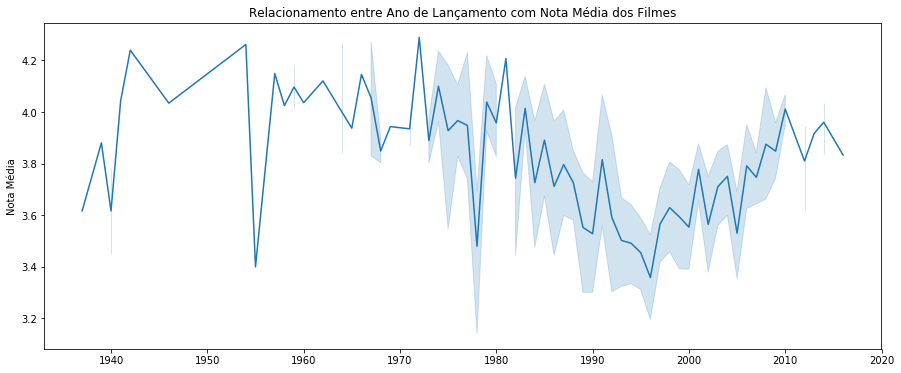

In [49]:
# solucao
ax = sns.lineplot(x="ano_de_lancamento", y="nota_media", data=filmes)
ax.figure.set_size_inches(15,6)	
ax.set(xlabel="", ylabel="Nota Média")
ax.set_title("Relacionamento entre Ano de Lançamento com Nota Média dos Filmes")

## Pergunta: Interprete a correlação entre `ano_de_lancamento` e a `nota_media`?

- Calcule a correlação numericamente (use o `corr` do pandas)
- Correlação não implica causalidade, qual "problema" na coleta dos dados pode gerar esse tipo de correlação?

In [72]:
# solução (código)
filmes['ano_de_lancamento'].corr(filmes['nota_media'])

-0.15914555204444447

### Solução (explicação)
Esse tipo de correlação diz que, por mais que duas coisas estejam correlacionadas não significa que ambas sejam a causa da outra. Um exemplo clássico é o da venda de sorvetes x temperatura. O aumento da temperatura pode fazer as vendas aumentarem, mas o aumento das vendas não irá aumentar a temperatura.

## Pergunta: analise um pairplot

- crie uma variável chamada `infos` baseada nas colunas `ano_de_lancamento`, `nota_media` e `total_de_votos` de `filmes`
- faça o pairplot usando seaborn
- coloque uma regressão linear para cada pequeno plot dentro dele

Text(0.5, 1.02, 'Dispersão entre Variáveis dos Filmes do MovieLens')

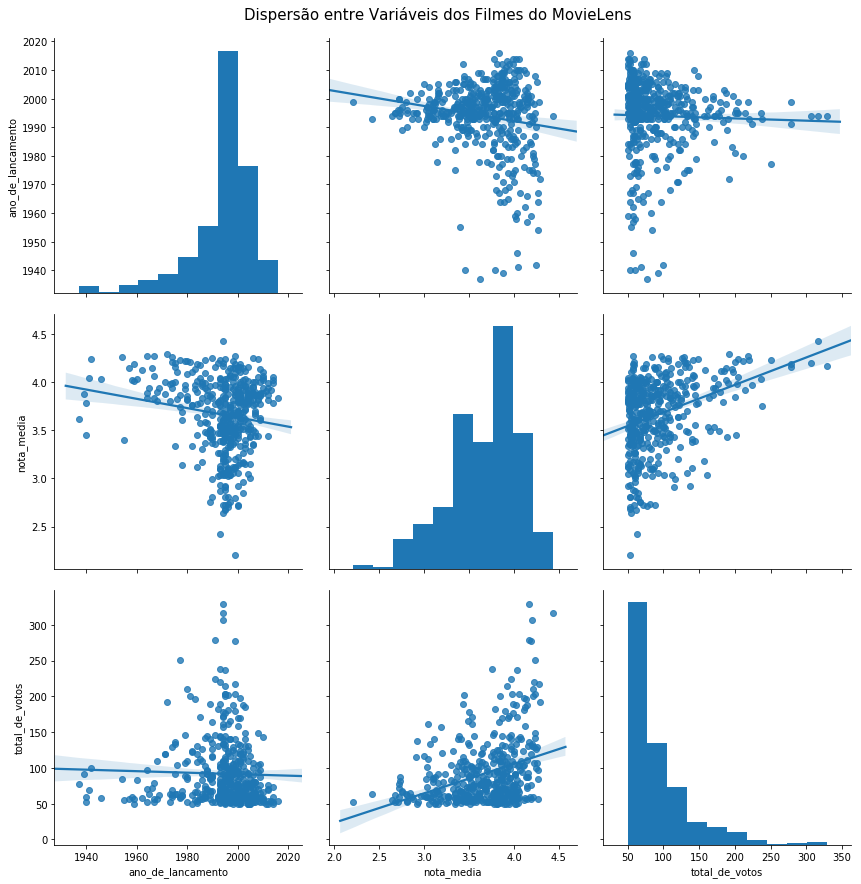

In [51]:
# solução
infos = filmes[['ano_de_lancamento', 'nota_media', 'total_de_votos']]
ax = sns.pairplot(infos, kind='reg', height=4) 
ax.fig.suptitle('Dispersão entre Variáveis dos Filmes do MovieLens', fontsize=15, y=1.02)

## Pergunta: analise um pairplot dos filmes de `Animation`

- use o dataframe `filmes`
- em um único pairplot separe com cores distintas os filmes da categoria `Animation` dos outros
- use uma palete como `husl`
- use marcadores distintos para cada um dos dois grupos
- faça o pairplot usando seaborn e coloque uma regressão linear para cada pequeno plot dentro dele
- tanto em x quanto y use somente três variáveis: `total_de_votos`, `ano_de_lancamento`, `nota_media`

Text(0.5, 1.02, 'Dispersão entre Variáveis dos Filmes de Animation do MovieLens e demais categorias')

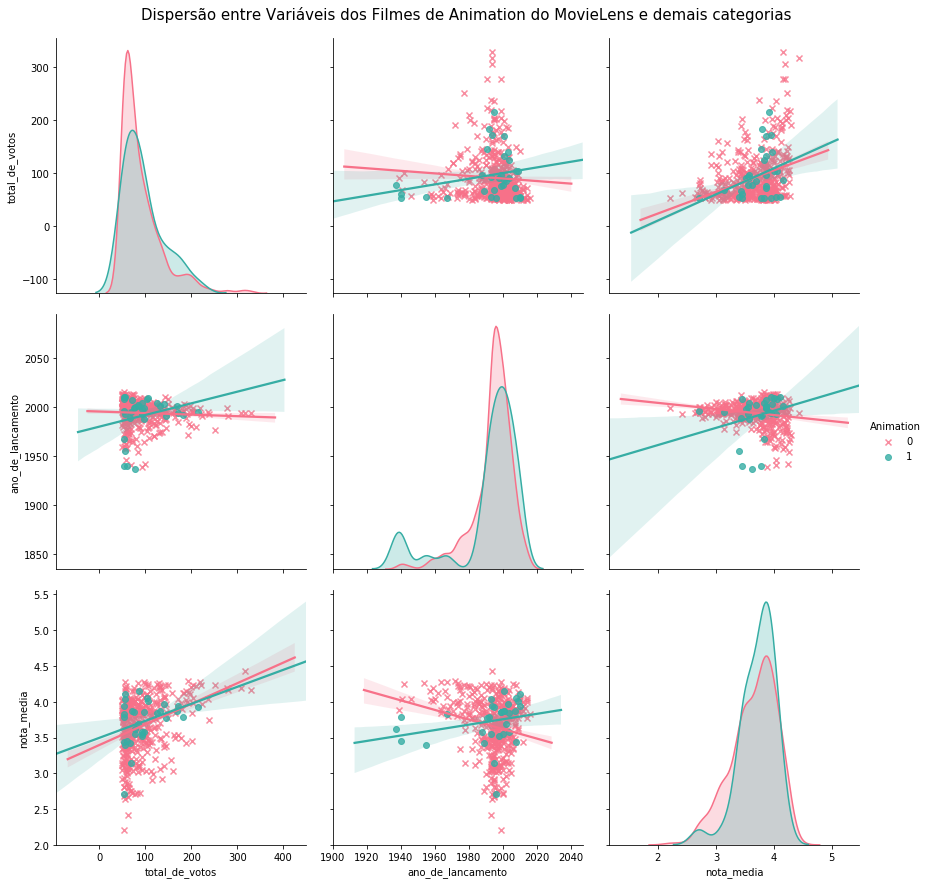

In [52]:
ax = sns.pairplot(x_vars=['total_de_votos','ano_de_lancamento', 'nota_media'], 
                  y_vars=['total_de_votos','ano_de_lancamento', 'nota_media'],
                  hue="Animation", 
                  data=filmes, 
                  palette="husl", 
                  kind='reg',
                  markers=["x", "o"],
                  height=4) 
ax.fig.suptitle('Dispersão entre Variáveis dos Filmes de Animation do MovieLens e demais categorias', fontsize=15, y=1.02)

## Pergunta: Analise a regressão em relação ao ano de lançamento.

- Como parece se comportar a `nota_media` de filmes de `Animation` mais antigos e mais recentes? (ano_de_lancamento x nota_media). Essa correlação parece ser baixa, mas parece ser linear?
- E o `ano_de_lancamento` x `total_de_votos`?
- E das outras categorias? Compare isso com os outros filmes.
- O que leva você levantar como hipótese para esse resultado?

### Solução:
- As notas médias dos filmes mais recentes de Animation atingem valores maiores se comparados com os filmes antigos. Acreditamos que muito se deve a quantidade de filmes feitos nos últimos anos e, com o aperfeiçoamento da tecnologia, suas notas melhoraram em comparação com filmes passados. Essa correlação parece ser linear de acordo com o pairplot;

- Há mais votos para os filmes de Animation lançados nos últimos anos em comparação a filmes antigos, principalmente no final da década de 90, início dos anos 2000. Parece termos uma correlação linear não somente pelo fato citado anteriormente, mas também pelo pairplot;

- Para ano de lançamento x nota média a correlação não é linear. Para ano de lançamento x total de votos nesse caso é quase estável;

- Podemos levantar como hipótese que o total de votos e as notas médias dos filmes de Animation possuem uma tendência a serem maiores que os demais filmes de outras categorias.


## Pergunta: Explore

- compartilhe conosco 2 visualizações extras que julgar interessante
- explique o que encontrou
- use quantas células (texto ou código) julgar necessário

## Filmes de Quentin Tarantino em relação aos demais filmes

In [75]:
#Considerando todos os filmes do Quentin Tarantino que estão presentes no DF filmes
tarantino = filmes.query("filmeId==1089 or filmeId==296 or filmeId==1729 or filmeId==6874 or filmeId==7438 or filmeId==53519 or filmeId==68157 or filmeId==99114 or filmeId==128360")
tarantino

,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,,,,,
296,Pulp Fiction (1994),1994.0,4.197068,307.0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0
1089,Reservoir Dogs (1992),1992.0,4.202290,131.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
6874,Kill Bill: Vol. 1 (2003),2003.0,3.961832,131.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
7438,Kill Bill: Vol. 2 (2004),2004.0,3.868182,110.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
68157,Inglourious Basterds (2009),2009.0,4.136364,88.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
99114,Django Unchained (2012),2012.0,3.943662,71.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


Text(0, 0.5, 'Nota Média')

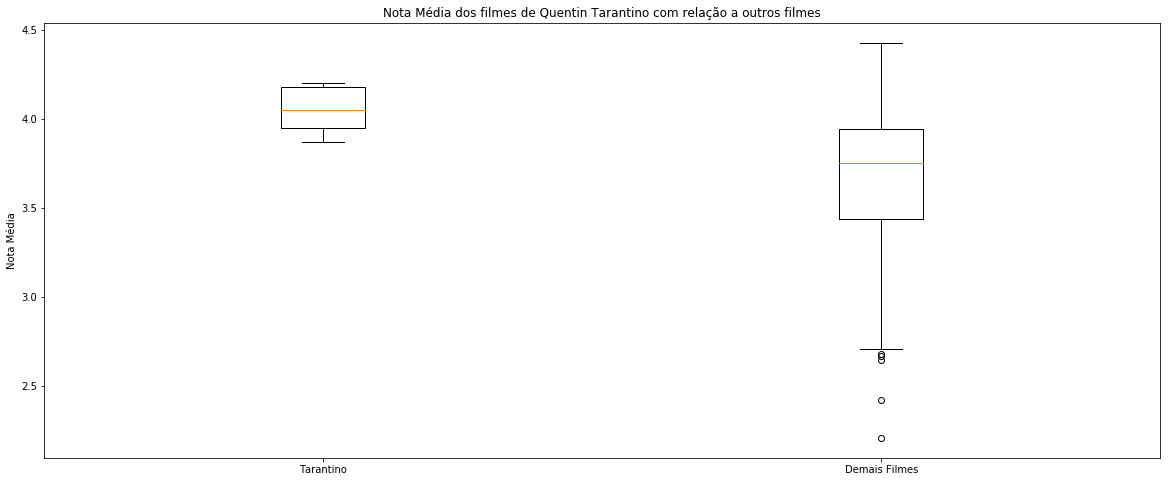

In [76]:
#Boxplot comparando a nota média destes filmes em relação a todos os filmes presentes do df filmes
fig, ax = plt.subplots(figsize=(20,8))	
plt.boxplot([tarantino.nota_media, filmes.nota_media], labels=["Tarantino", "Demais Filmes"])
plt.title("Nota Média dos filmes de Quentin Tarantino com relação a outros filmes", fontsize=12)
ax.set_ylabel('Nota Média')			

Encontramos neste caso uma grande diferença com relação aos filmes do diretor/produtor Quentin Tarantino aos demais filmes da amostra, quando tratamos da nota média. Claro que o mesmo não possui uma amostra tão grande de filmes, no entanto suas médias são altas se comparadas a todo universo de filmes.

# Total de Votos dos Filmes de Animation ao passar dos anos

Text(0.5, 1.0, 'Relacionamento entre Ano de Lançamento com Total de Votos dos Filmes de Animation')

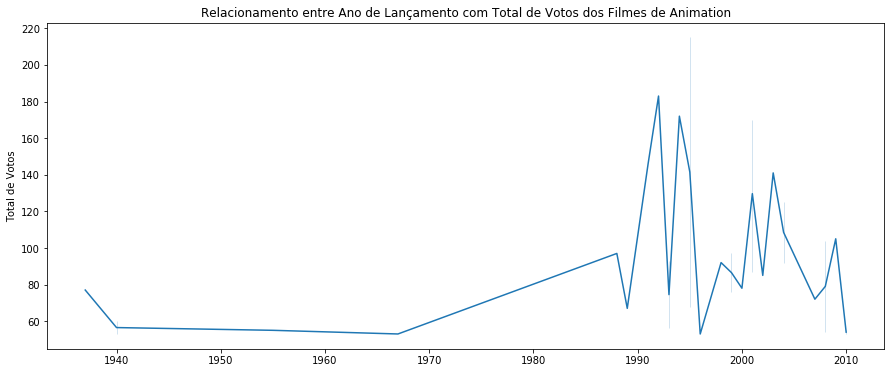

In [58]:
# solucao
ax = sns.lineplot(x="ano_de_lancamento", y="total_de_votos", data=boxplot_Animation)
ax.figure.set_size_inches(15,6)	
ax.set(xlabel="", ylabel="Total de Votos")
ax.set_title("Relacionamento entre Ano de Lançamento com Total de Votos dos Filmes de Animation")

Nesse caso é interessante destacar a quantidade expressiva de votos nos filmes de Animation nos últimos anos, pois provavalmente com o avanço da tecnologia, apresentando gráficos cada vez melhores, muitos filmes dessa categoria foram produzidos e consequentemente atraíram um público cada vez maior.